 ----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
<h1><center>
    
Practical exam on Computer Vision
    
Second Part
 
( January, 20th, 2022 )
</center></h1>    

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


This is the practical exam that should be developed during 2 hours. Note that to approve the exam, both parts (theoretical and practical ones) should be approved. Each exercise is defined with the corresponding score.

## Exercise 1

### Where is Wally?

'Where's Wally' is a popular British series of puzzle books that has garnered interest in both children and adults. Finding Waldo (as is named in North America) is never easy but we are going to make it quickly using image processing techniques.

**Ex. 1.1** (0.5 points) Load the image `finding_waldo.jpg` together with the template `template.jpg` from the folder `images_exam`. Obtain the image template2 dividing by 2 the intensity of template. Show the three images in one single figure using the `subplots` function and print their principal image features: type and shape.

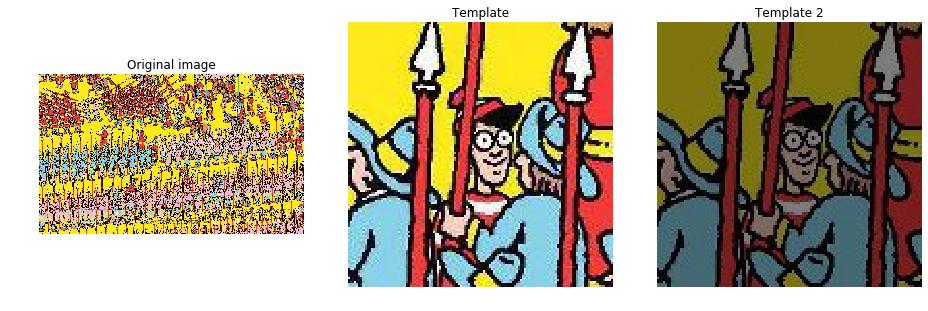

Waldo features: (1251, 2048, 3) uint8
Template features: (128, 128, 3) uint8
Template 2 features: (128, 128, 3) uint8


In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread, imsave
from skimage.color import rgb2gray
from skimage.feature import match_template

#your solution
waldo=imread('./images_exam/finding_waldo.jpg')
template=imread('./images_exam/template.jpg')
template2 = template//2

def show_images(m, n, imgs, labels):
    fig, axes = plt.subplots(m, n, figsize=(13, 6))
    ax = axes.ravel()
    cmap='gray'
    for i in range(m*n):
        ax[i].imshow(imgs[i], cmap)
        ax[i].set_title(labels[i])
        ax[i].axis('off')
        
    plt.tight_layout()
    plt.show()

show_images(1, 3,
        [waldo, template, template2], 
        ["Original image", "Template", "Template 2"])

print("Waldo features:", waldo.shape, waldo.dtype)
print("Template features:", template.shape, template.dtype)
print("Template 2 features:", template2.shape, template2.dtype)

**Ex. 1.2** (1.5 points) Show the euclidean distance and the normalized cross-correlation between the original image and both templates. Print the maximum and the minimum of the two distances for each of the templates. Explain what is the difference when using euclidean distance and the normalized cross-correlation for template matching.


In [2]:
#your solution
from skimage.color import rgb2gray, rgba2rgb
from skimage import feature, img_as_float
# Calculates the euclidian distance between two images
def euclidean_distance(img, template):
    m_img, n_img = img.shape[0], img.shape[1]
    m_temp, n_temp = template.shape[0], template.shape[1]
    m, n = m_img - m_temp, n_img - n_temp
    
    distance = np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            distance[i,j] = np.linalg.norm(img[i:i + m_temp, j:j + n_temp] - template)
            
    # Return the distance normalized
    return distance

# Calculates the normalized cross-correlation between two images
def normalized_x_correlation(img, template):
    return feature.match_template(img, template)

# Normalize image to range [0,1]
def normalize(img):
    minimum = np.min(img)
    maximum = np.max(img)
    return (img - minimum)/(maximum - minimum)

# Convert images to grayscale
waldo = rgb2gray(waldo)
template_gray = rgb2gray(template)
template2_gray = rgb2gray(template2)

# Apply template matching and normalize to range [0,1]
euclidean = euclidean_distance(waldo, template_gray)
cross = normalized_x_correlation(waldo, template_gray)

# Apply template matching and normalize to range [0,1]
euclidean2 = euclidean_distance(waldo, template2_gray)
cross2 = normalized_x_correlation(waldo, template2_gray)

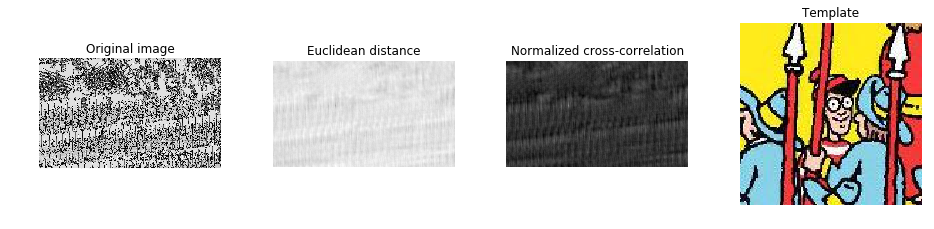

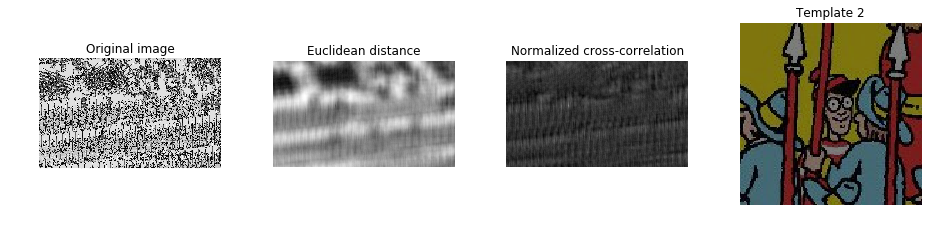

In [4]:
# Show images
show_images(1, 4,
            [waldo, euclidean, cross, template], 
            ["Original image", "Euclidean distance", "Normalized cross-correlation",
             "Template"])

show_images(1, 4,
            [waldo, euclidean2, cross2, template2], 
            ["Original image", "Euclidean distance", "Normalized cross-correlation",
             "Template 2"])

In [22]:
print("Template:" )
print("Min euclidian distance:", euclidean.min())
print("Min normalized cross-correlation:", cross.max())
print("Max euclidian distance:", euclidean.max() )
print("Max normalized cross-correlation:", cross.max())

print("Template 2:" )
print("Min euclidian distance:", euclidean2.min())
print("Min normalized cross-correlation:", cross2.max())
print("Max euclidian distance:", euclidean2.max() )
print("Max normalized cross-correlation:", cross2.max())

Template:
Min euclidian distance: 3.9588975764984995
Min normalized cross-correlation: 0.9960296053615997
Max euclidian distance: 69.87947653928244
Max normalized cross-correlation: 0.9960296053615997
Template 2:
Min euclidian distance: 41.31053497874206
Min normalized cross-correlation: 0.9960383487403052
Max euclidian distance: 78.24067849371214
Max normalized cross-correlation: 0.9960383487403052


**R**: The SSD is affected by contrast changes, but the NCC is not affected.
Euclidian's minimum and maximum has increased at the darker image.
NCC's minimum and maximum has changed a insignificantly, so it comproves that NCC is contrast invariant.

**Ex 1.3** (1 point) Localize Waldo in the image using both templates separately and show the result.

Template using euclidean distance:


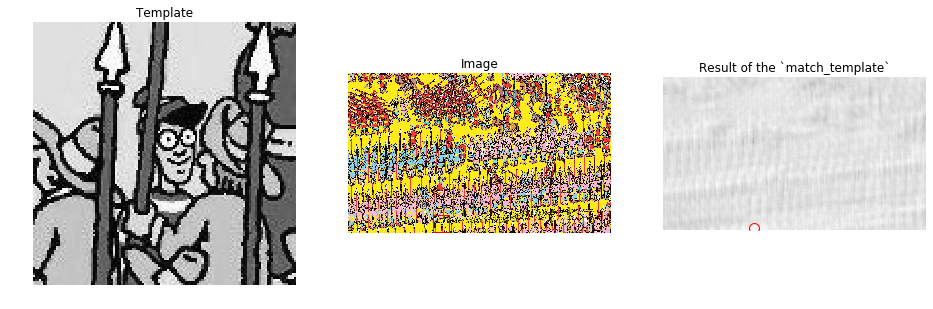

Template 2 using euclidean distance:


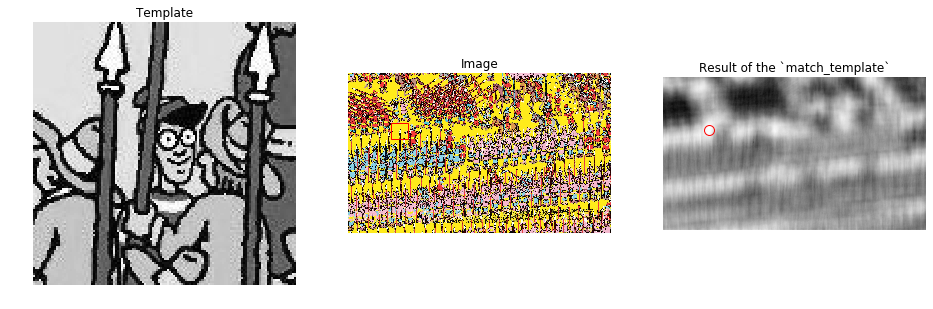

In [7]:
#your solution
def tm_results(result,imgTemp, image): 
    # Busca el maximo y nos devulve la posición (i,j)
    ij = np.unravel_index(np.argmax(result), result.shape)
    x, y = ij[::-1]

    #visualize it
    fig = plt.figure(figsize=(16, 6))
    ax1 = plt.subplot(1, 3, 1)
    ax2 = plt.subplot(1, 3, 2)
    ax3 = plt.subplot(1, 3, 3)

    ax1.imshow(imgTemp, cmap=plt.cm.gray)
    ax1.set_axis_off()
    ax1.set_title('Template')

    ax2.imshow(image, cmap=plt.cm.gray)
    ax2.set_axis_off()
    ax2.set_title('Image')
    
    # highlight matched region
    himg, wimg = imgTemp.shape
    rect = plt.Rectangle((x, y), wimg, himg, edgecolor='r', facecolor='none')
    ax2.add_patch(rect)

    ax3.imshow(result, cmap='gray')
    ax3.set_axis_off()
    ax3.set_title('Result of the `match_template`')
    
    # highlight matched region
    ax3.autoscale(False)
    ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)

    plt.show()

print("Template using euclidean distance:")
tm_results(euclidean, template_gray, waldo)
print("Template 2 using euclidean distance:")
tm_results(euclidean2, template2_gray, waldo)

## Exercise 2

It's a pleasure see you here once again! The Squid Game has not finished for you!

We are going to play the Green Ligth, Red Ligth game, once again. Last time we asked you to anonymize the images in order to confuse the gigant doll, to save people. Now we need to be more specific and we are going to localize the people firstly.

<img src="images_exam/doll.jpg" width="400" height="40">

**Ex.2.1** (0.5 point) Load the image collection from  `images_exam\green_light\` and visualize the video.

<IPython.core.display.Javascript object>


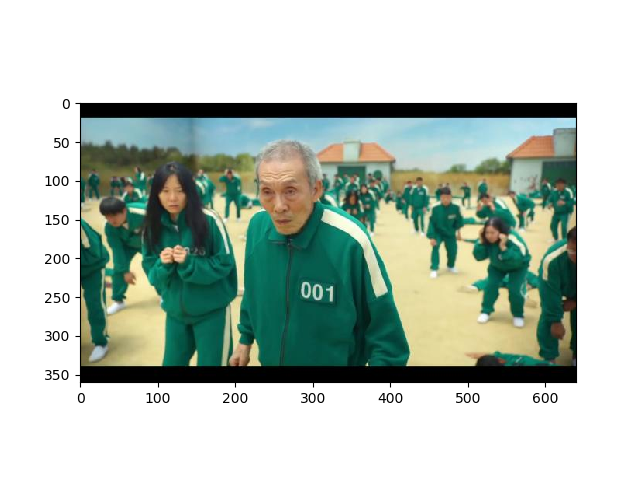

In [8]:
#your solution
%matplotlib nbagg 
from matplotlib import pyplot as plt, animation as anim
from skimage import io

imgs = io.collection.ImageCollection('images_exam/green_light/*.jpg')
total_film_frames = len(imgs)

#generates the next frame
def frame_update(frame_num) :
    act_img.set_array(imgs[frame_num])
    return act_img

#visualize the video using FuncAnimation
fig = plt.figure()
act_img = plt.imshow(imgs[0], animated = True)
ani = anim.FuncAnimation(fig, frame_update, frames = total_film_frames, interval = 20, repeat = False)
plt.show()

**Ex.2.2** (0.5 point) We are going to use a cascade face detector.

From 'skimage' import `data` to load the coresponding face detector and the trained file `data.lbp_frontal_face_cascade_filename()`. Try it on the first image and visualize the result (as shown) in the first image of the collection.

<img src="images_exam/FaceDetector.png" width="400" height="40">


<IPython.core.display.Javascript object>


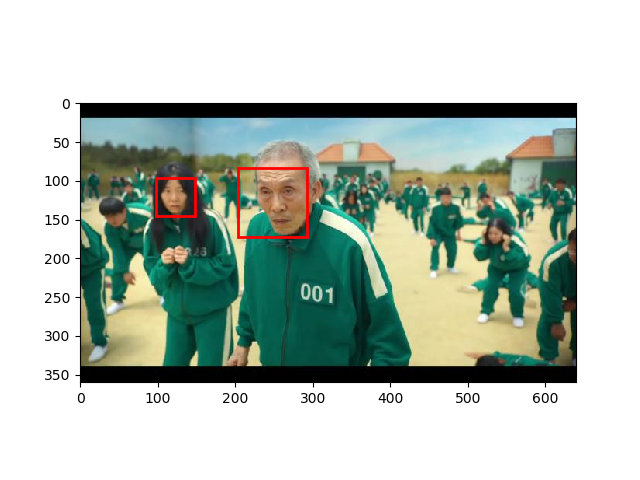

In [9]:
#your solution
from skimage.feature import Cascade
from skimage import data
from matplotlib import patches

# Load the Cascade trained file from the module root.
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the dectector cascade
query = imgs[0]
detector = Cascade(trained_file)
detected = detector.detect_multi_scale(img=query, scale_factor=1.2, step_ratio=1, min_size=(50, 50),
                                       max_size=(500, 500))

plt.imshow(query)
img_desc = plt.gca()
plt.set_cmap('gray')

for patch in detected:

    img_desc.add_patch(
        patches.Rectangle(
            (patch['c'], patch['r']),
            patch['width'],
            patch['height'],
            fill=False,
            color='r',
            linewidth=2
        )
    )

plt.show()

**Ex. 2.3** (1 points) Use a gaussian to anonimize only the faces. Notice that we are not asking about blurring the whole image but only those areas that are marked as faces by the algorithm. Apply it on the first image of the image collection. Comment your solution.

In [21]:
#your solution
i = imgs[0]
for patch in detected:
    i[patch['c']:patch['r'], patch['width']:patch['height'],:] = gaussian([patch['c']:patch['r'], patch['width']:patch['height'],:], sigma=2, multichannel=True)

SyntaxError: invalid syntax (<ipython-input-21-d7a02037da09>, line 4)

**R**: Collect the points with the patches and apply guassian to each box at the first image.

**Ex. 2.4** (1 points) Now, update the function `frame_update` to anonimize the faces in the video. Explain your solution.

<IPython.core.display.Javascript object>


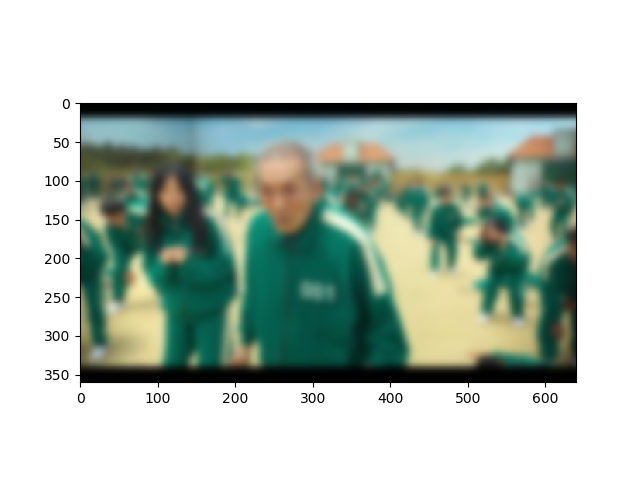

In [11]:
%matplotlib nbagg
from skimage.feature import Cascade
from skimage import data
from matplotlib import patches
from skimage import filters
from matplotlib import pyplot as plt
from skimage.filters import gaussian

#your solution
#generates the next frame
def frame_update(frame_num) :
    act_img.set_array(gaussian(imgs[frame_num], sigma=5, multichannel=True))
    return act_img

#visualize the video using FuncAnimation
fig = plt.figure()
act_img = plt.imshow(imgs[0], animated = True)
ani = anim.FuncAnimation(fig, frame_update, frames = total_film_frames, interval = 20, repeat = False)
plt.show()

## Exercise 3

We are going to test the image classification using a PCA model.

**Ex 3.1** (1 points) From `./images_exam/AnimalFace/`, load those images corresponding to bear (i.e `./images_exam/AnimalFace/BearHead`), deer (folder `DeerHead`), monkey (`MonkeyHead`), eagle (`EagleHead`) and panda (`PandaHead`). 

Save all the images in one single data array and make the corresponding labeling array

In [12]:
%matplotlib inline
from skimage.transform import resize
import os
from skimage.color import rgb2gray
from skimage.io import imread
import numpy as np

In [13]:
#your solution
from skimage import img_as_ubyte
def load_resize_rgb(path):
    collection = os.listdir(path)
    imgs = []
    for file in collection:
        img = imread(path + file)
        img = rgb2gray(img)
        img = resize(img, (250,250))
        imgs.append(img)
        
    return imgs

bear_images = load_resize_rgb("./images_exam/AnimalFace/BearHead/")
deer_images = load_resize_rgb("./images_exam/AnimalFace/DeerHead/")
monkey_images = load_resize_rgb("./images_exam/AnimalFace/MonkeyHead/")
eagle_images = load_resize_rgb("./images_exam/AnimalFace/EagleHead/")
panda_images = load_resize_rgb("./images_exam/AnimalFace/PandaHead/")
all_images = bear_images + deer_images + monkey_images + eagle_images + panda_images

In [14]:
class_labels = np.concatenate((np.zeros(len(bear_images)), np.ones(len(deer_images)), 2*np.ones(len(monkey_images)),
                               3*np.ones(len(eagle_images)), 4*np.ones(len(panda_images)))).reshape(len(all_images),1)

**Ex 3.2** (1 points) Prepare the images as a list of vectors with length equal to the image pixels and divide the dataset into train and test sets (0.7/0.3, respectively)

In [15]:
#your solution
from sklearn.model_selection import train_test_split 

# Your solution here
x = np.array(all_images).reshape(len(class_labels), 250*250)
y = class_labels
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3)

/usr/lib/python3/dist-packages/sklearn/model_selection/_split.py:1609: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return floored.astype(np.int)
/usr/lib/python3/dist-packages/sklearn/model_selection/_split.py:1609: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release no

**3.3** (1 points) Train a PCA model, chossing a number of components that preserve 96% of information (i.e 0.96 of accumulated variance). Plot the accumulated variance to check the number of components.
Hint: To this purpose you can check using 150, 160, 170, 180, 190 and 200 eigenvectors.

In [16]:
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report 

#your solution
n_components = 200
pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X_train)

/usr/lib/python3/dist-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
/usr/lib/python3/dist-packages/sklearn/linear_model/least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=True, fit_path=True,
/usr/lib/python3/dist

Accumulated variance: 0.9726325997996242


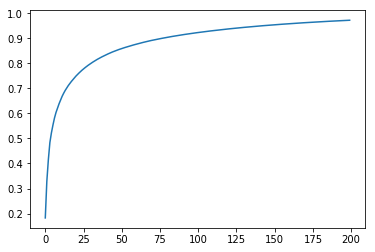

In [17]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
print("Accumulated variance:", np.max(np.cumsum(pca.explained_variance_ratio_)))

**3.4** Train an AdaBoost Classification model in the original space and with the derived PCA data and 100 weak classifiers and compare the results (the performance of both recognition methods).

In [18]:
from sklearn.ensemble import AdaBoostClassifier
#your solution
# Train a Adaboost classifier
clf = AdaBoostClassifier(n_estimators=100, learning_rate=1.0)
clf.fit(X_train, y_train)

result = clf.predict(X_test)
acc = clf.score(X_test, y_test)
print("Result: ", result)
print("Accuracy: ", acc)

/usr/lib/python3/dist-packages/sklearn/ensemble/gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
/usr/lib/python3/dist-packages/sklearn/ensemble/gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
/usr/lib/python3/d

/usr/lib/python3/dist-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/usr/lib/python3/dist-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for ad

/usr/lib/python3/dist-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/usr/lib/python3/dist-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for ad

KeyboardInterrupt: 